In [3]:
import numpy as np

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import seaborn as sns
import random
import torch

# Change figure aesthetics
%matplotlib inline
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 1.5})
np.set_printoptions(suppress=True,precision=4)

random.seed(0)
np.random.seed(0)

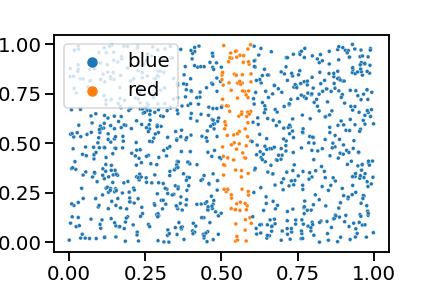

In [6]:
# Get x,y points that roughly give a grid

N = 1000
x = np.random.uniform(size=N)
y = np.random.uniform(size=N)

c = ['blue']*N

for i in range(N):
    
    if x[i] > 0.50 and x[i] < 0.60:
        c[i] = 'red'

fig, ax = plt.subplots()
#fig.set_size_inches(11.7, 8.27)
fig.set_size_inches(6, 4)
sns.scatterplot(x=x, y=y, s=15, hue=c, ax=ax)
plt.show()

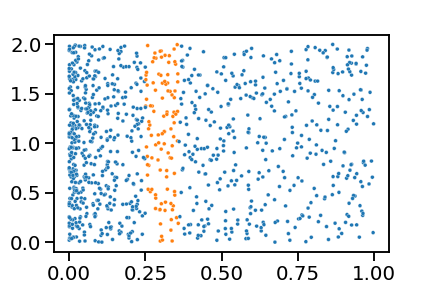

In [7]:
# Get x,y points that roughly give a grid

x_ = x**2
y_ = 2*y

fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
sns.scatterplot(x=x_, y=y_, s=15, hue=c, ax=ax)
plt.setp(ax.get_legend().get_texts(), fontsize='10') # for legend text
ax.legend([],[], frameon=False)
plt.show()

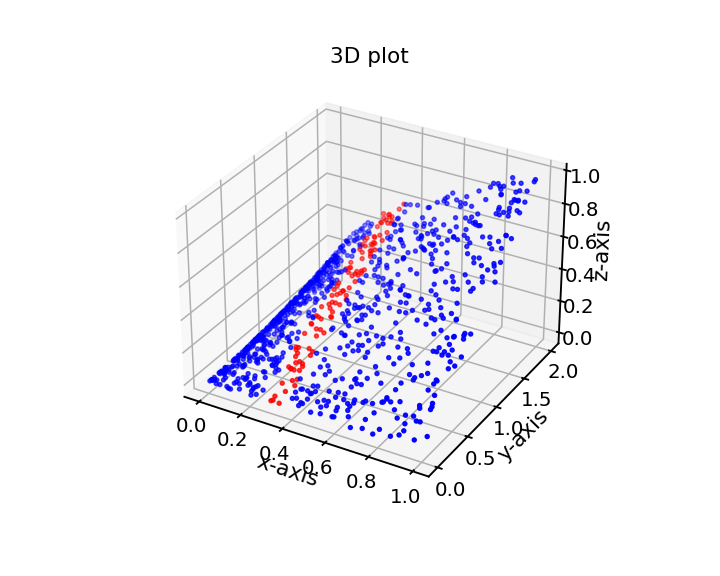

In [8]:
%matplotlib widget

t1, t2, t3 = x**2, 2*y, x*y

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(t1, t2, t3, s=15, c=c)
# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# displaying the plot
plt.show()

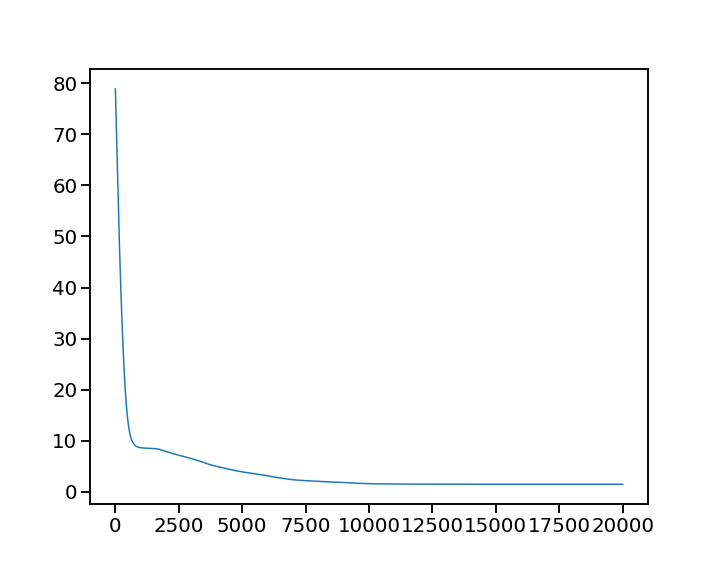

In [32]:
import torch

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1, 4, 1

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = x.detach()**2

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
losses = []

for t in range(20000):
    
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    
    losses.append(loss.item())
    
    model.zero_grad()
    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(losses)

In [34]:
with torch.no_grad():
    
    T = torch.randn(2, 1)
    print(T)
    print(model(T))
    print(T**2)


tensor([[ 0.9208],
        [-0.2635]])
tensor([[0.7683],
        [0.0884]])
tensor([[0.8479],
        [0.0694]])


In [31]:
model

Sequential(
  (0): Linear(in_features=1, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [41]:
for p in model[0].parameters():
    print(p)
for p in model[2].parameters():
    print(p)

Parameter containing:
tensor([[-1.7182],
        [ 1.5410],
        [ 0.0966],
        [-0.1787]], requires_grad=True)
Parameter containing:
tensor([ 1.2304,  0.9933, -0.7125,  1.6470], requires_grad=True)
Parameter containing:
tensor([[ 1.7349,  1.8077, -0.4907, -1.4219]], requires_grad=True)
Parameter containing:
tensor([-1.4845], requires_grad=True)


In [40]:
0.9208*1.5410 + 0.9208*0.0966

1.5079020799999998

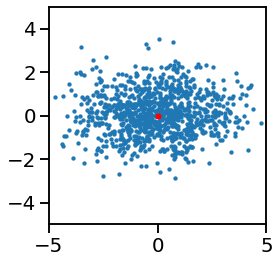

In [66]:
from torch.distributions import multivariate_normal, normal

mnorm_dist = multivariate_normal.MultivariateNormal(loc=torch.Tensor([0,0]), 
                                                   covariance_matrix=torch.Tensor([[3,0],[0,1]]), 
                                                   validate_args=True)

samples = mnorm_dist.sample(sample_shape=(1000,))
S = samples.cpu().numpy()
plt.scatter(S[:,0],S[:,1],s=8)
plt.scatter([0],[0],s=20,c='red')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')

torch.Size([1000, 1]) torch.Size([1000, 1])
torch.Size([1000, 2])


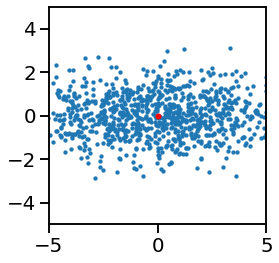

In [71]:
norm_dist_x = normal.Normal(loc=0, scale=3., validate_args=True)
norm_dist_y = normal.Normal(loc=0, scale=1., validate_args=True)

samplesx = norm_dist_x.sample(sample_shape=(1000,1))
samplesy = norm_dist_y.sample(sample_shape=(1000,1))

print(samplesx.shape,samplesy.shape)
S = torch.cat([samplesx, samplesy], dim=1)
print(S.shape)

plt.scatter(S[:,0],S[:,1],s=8)
plt.scatter([0],[0],s=20,c='red')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')

In [73]:
xsq , xpy, xy = torch.pow(samplesx,2), samplesx + samplesy, samplesx * samplesx

print(xsq.shape, xpy.shape, xy.shape)

torch.Size([1000, 1]) torch.Size([1000, 1]) torch.Size([1000, 1])


In [74]:
polynom = torch.cat([xsq , xpy, xy ], dim=1)
polynom.shape

torch.Size([1000, 3])

In [75]:
polynom[0]

tensor([10.5652, -3.2031, 10.5652])

In [76]:
samplesx[0]**2, samplesx[0] + samplesy[0], samplesx[0] * samplesx[0]

(tensor([10.5652]), tensor([-3.2031]), tensor([10.5652]))